In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import pickle

In [12]:
main_path='/Users/jalalsmac/CVPR/Final/Faces Final'

In [14]:
foldernames = os.listdir(main_path)

In [18]:
foldernames = [f for f in os.listdir(main_path) if f != '.DS_Store']
print(foldernames)

['ABIR', 'JALAL', 'SHAHRIAR']


In [20]:
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    print(folder,label)

ABIR 0
JALAL 1
SHAHRIAR 2


In [24]:
individualpath_for_jalal=os.path.join(main_path,foldernames[1])
print(individualpath_for_jalal)

/Users/jalalsmac/CVPR/Final/Faces Final/JALAL


In [26]:
imgname_jalal=os.listdir(individualpath_for_jalal)

each_img_path_jalal=os.path.join(individualpath_for_jalal,imgname_jalal[1])
print(each_img_path_jalal)

/Users/jalalsmac/CVPR/Final/Faces Final/JALAL/jalal00615.png


In [28]:
read_img=cv2.imread(each_img_path_jalal)
print(read_img.shape)

(400, 500, 3)


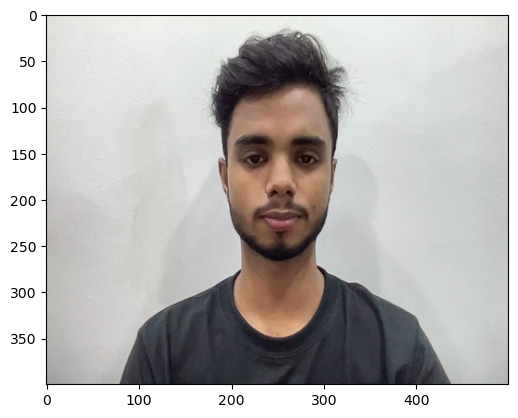

In [30]:
rgb_img=cv2.cvtColor(read_img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgb_img)
plt.show()

In [32]:
X_train=[]
for folder in foldernames:
    individualpath = os.path.join(main_path, folder)
    imgnames = os.listdir(individualpath)
    label=foldernames.index(folder)
    for img in imgnames:
         try:
            each_img_path = os.path.join(individualpath, img)
            read_img = cv2.imread(each_img_path)
            rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
            resize_img = cv2.resize(rgb_img, (200, 200))
            X_train.append([resize_img, label])
         except Exception as e:
                             print(f"Error processing image {each_img_path}: {e}")


In [33]:
np.random.shuffle(X_train)

In [34]:
X,Y=zip(*X_train)

In [35]:
print(type(X))


<class 'tuple'>


In [36]:
X = np.array(X, dtype='float32')/255.0
print(X.shape)

(2809, 200, 200, 3)


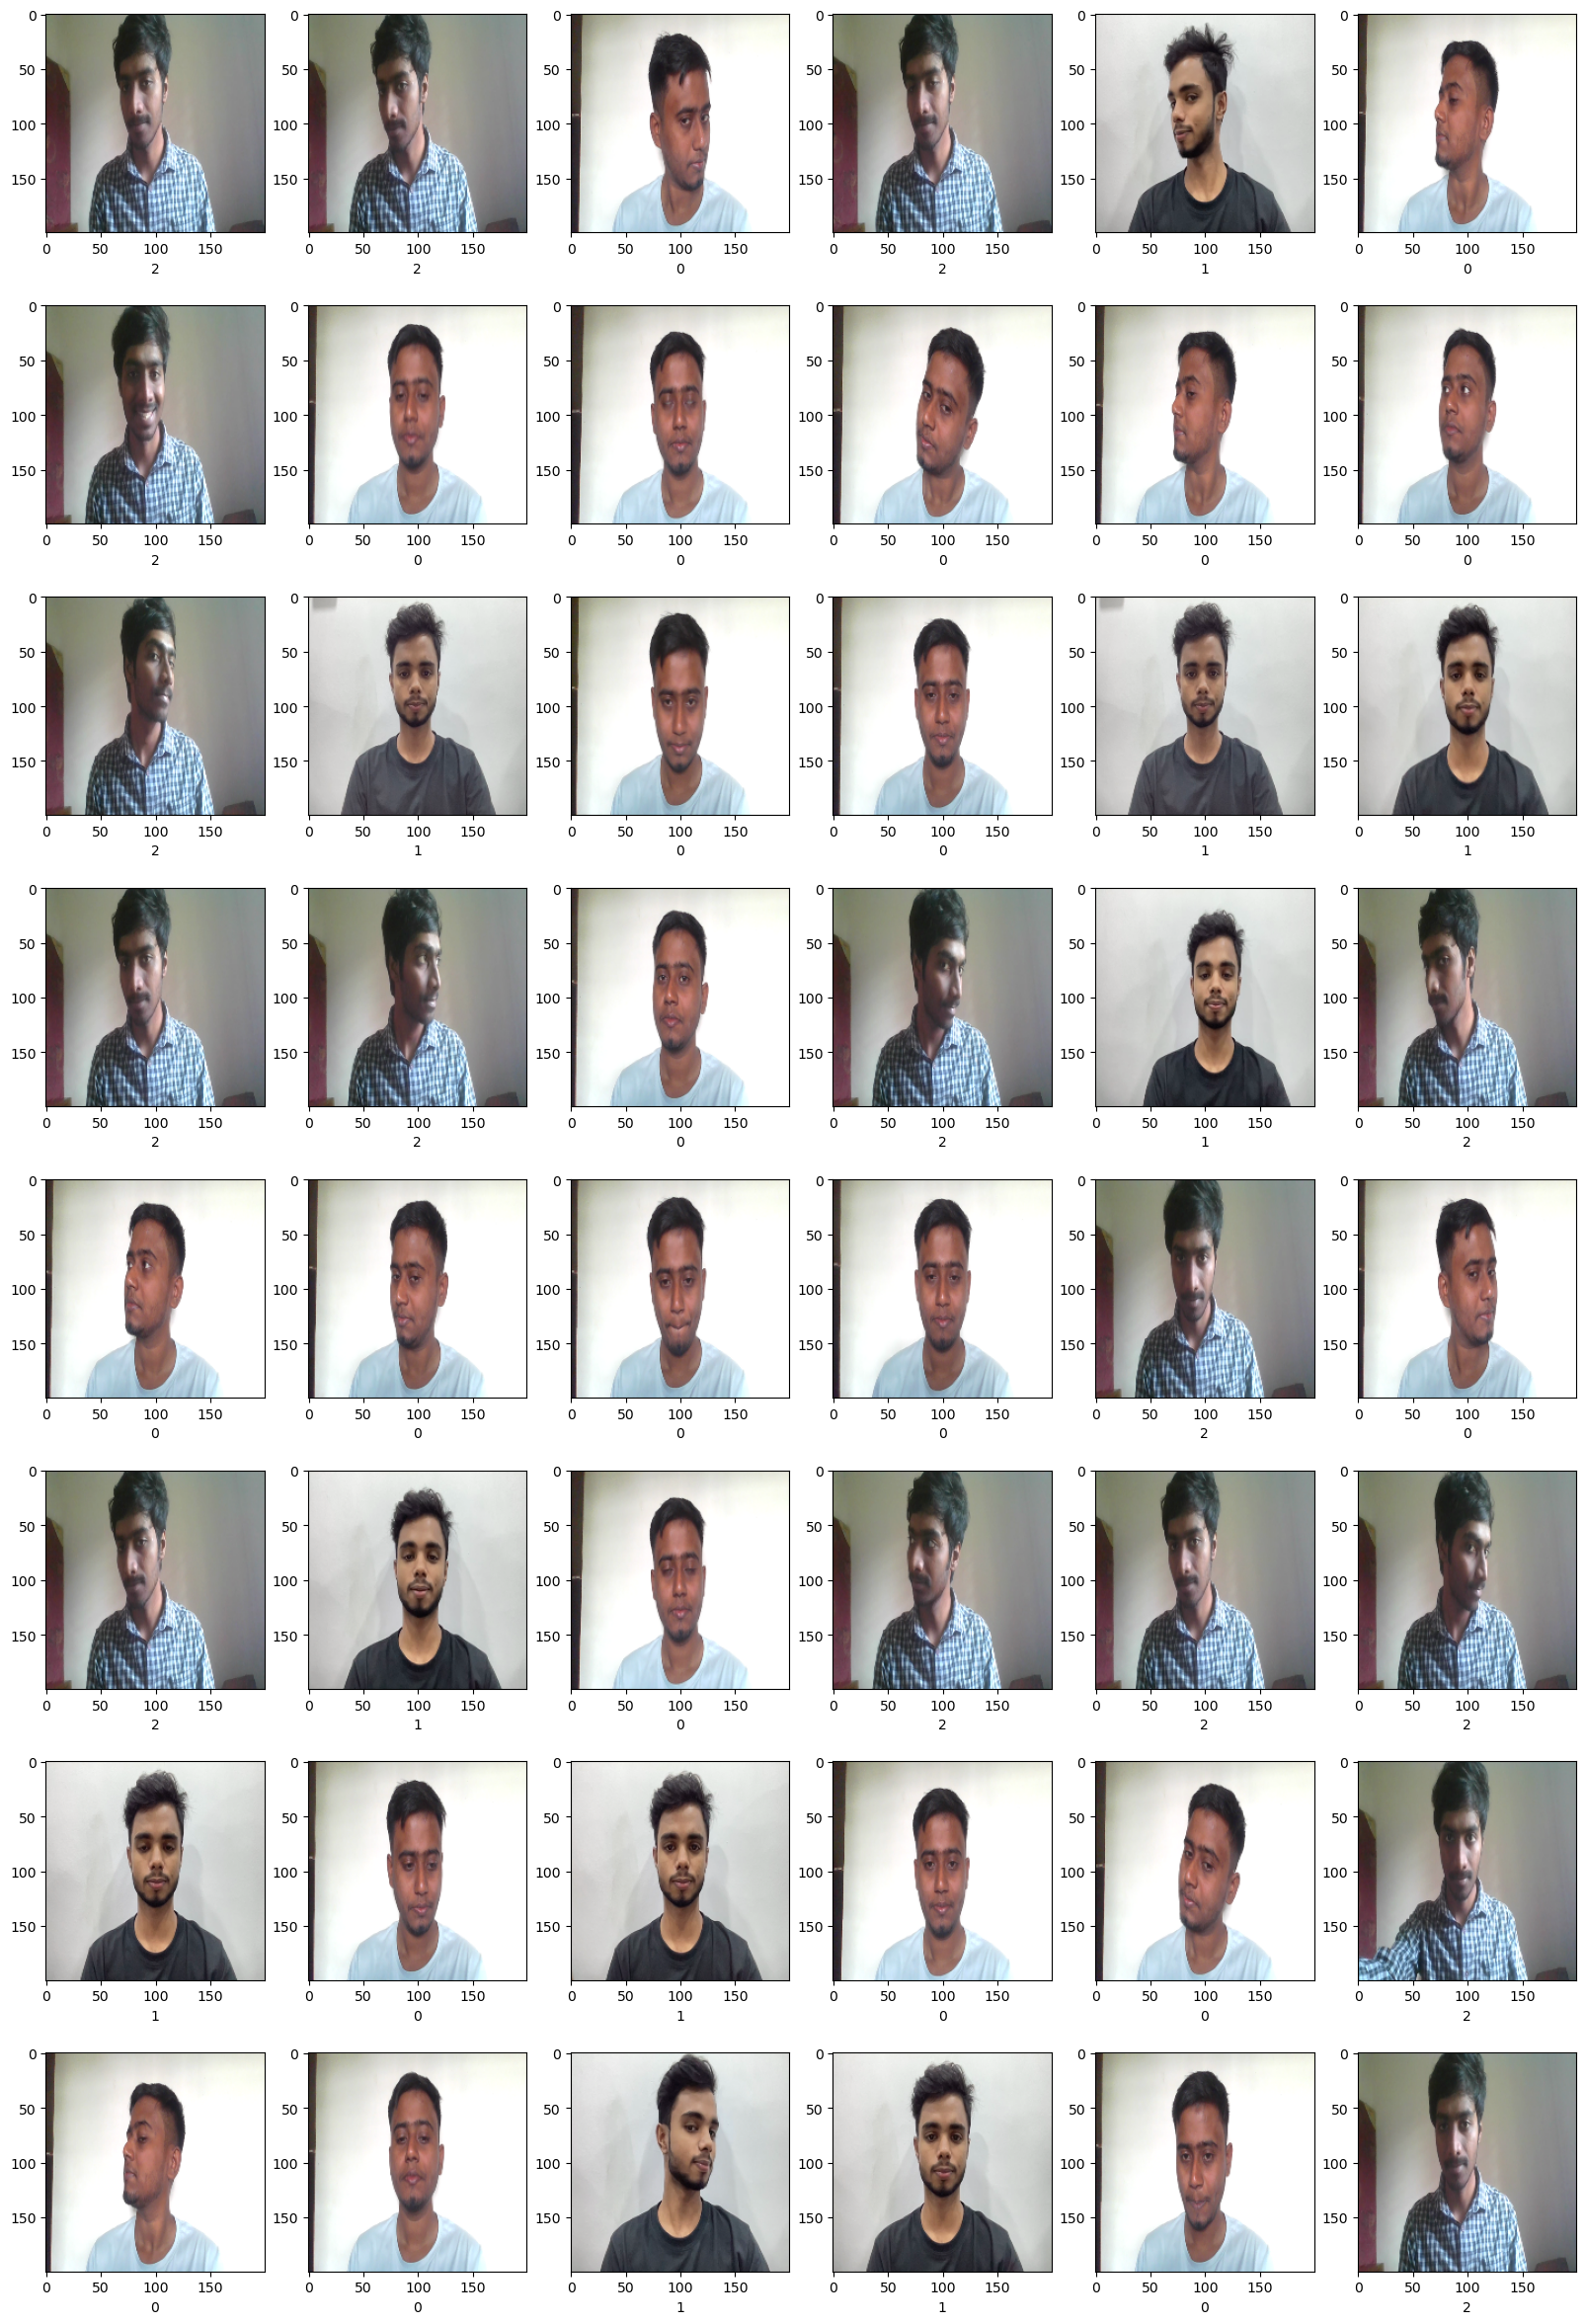

In [42]:
plt.figure(figsize=(20,30))
for i in range(48):
  plt.subplot(8,6,i+1)
  plt.imshow(X[i])
  plt.xlabel(Y[i])
plt.show()

In [44]:
with open('train_img.pkl', 'wb') as file:
    pickle.dump(X, file)

In [46]:
with open('train_label.pkl', 'wb') as file:
    pickle.dump(Y, file)

In [48]:
Y=np.array(Y)

In [50]:
with open('train_label_modified.pkl', 'wb') as file:
    pickle.dump(Y, file)